<div style="border:solid Chocolate 2px; padding: 40px">

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> похвала, рекомендации «со звёздочкой», полезные лайфхаки, которые сделают и без того красивое решение ещё более элегантным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> некритичные ошибки или развивающие рекомендации на будущее. 
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Критичные ошибки, которые обязательно нужно исправить.
</div>

Я не смогу принять проект, если в нём будет хотя бы одна критичная ошибка или несколько некритичных ошибок - тогда проект нужно будет немного доработать. Но это нестрашно - я обязательно дам тебе подсказку или укажу верное направление.
    
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
    
Ты также можешь задавать свои вопросы, реагировать на мои комментарии, делать пометки и пояснения - полная творческая свобода! Но маленькая просьба - пускай они будут отличаться от моих комментариев, это поможет избежать путаницы в нашем общении:)
Например, вот так:
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*твой текст*
</div>
    
Давай посмотрим на твой проект!

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

Инструкция по выполнению проекта
1. Подготовьте данные
-  Откройте файлы и изучите их.
(Путь к файлам:
/datasets/gold_recovery_train_new.csv. Скачать датасет
/datasets/gold_recovery_test_new.csv. Скачать датасет
/datasets/gold_recovery_full_new.csv. Скачать датасет)
- Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.
-  Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
-  Проведите предобработку данных.
1.1. Выполнен шаг 1: данные подготовлены
- Проверена формула вычисления эффективности обогащения
- Проанализированы признаки, недоступные в тестовой выборке
- Проведена предобработка данных
2. Проанализируйте данные
- Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.
- Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
- Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
2.1 Выполнен шаг 2: данные проанализированы
- Исследовано изменение концентрации элементов на каждом этапе
- Проанализированы распределения размеров гранул на обучающей и тестовой выборках
- Исследованы суммарные концентрации
3. Постройте модель
- Напишите функцию для вычисления итоговой sMAPE.
- Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.
3.1 Выполнен шаг 3: построена модель прогнозирования
- Написана функция для вычисления итогового sMAPE
- Обучено и проверено несколько моделей
- Выбрана лучшая модель, её качество проверено на тестовой выборке

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Прекрасное вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!
    
Спасибо, что есть оглавление в плагине toc и в виде гиперссылок - по проекту удобно перемещаться:)

## Подготовка данных

In [1]:
import pandas as pd
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали - отлично! Спасибо, что перезапускаешь проект перед отправкой на ревью - это важный шаг, который поможет избежать простых и досадных ошибок при воспроизведении решнеия:)
    </div>
    

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Ты импортируешь библиотеки и модули, которые не используешь в проекте - так делать не стоит, так как ты забиваешь окружение лишними  инструментами.
    
В блоке импорта стоит оставить только то, что реально используется в проекте.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [2]:
data = pd.read_csv('/datasets/gold_recovery_full_new.csv')
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Данные загрузили.
    
При считывании данных из файла здорово перестраховывать себя от ошибок, связанных, например, с неверным указанием пути к файлу. А иногда бывает, что работаешь с файлом локально, выгружаешь его на сервер, ожидая, что он будет принимать данные, которые лежат на том же сервере, а код падает с ошибкой, потому что путь к файлу не поменялся с локального на серверный.
    
Для этого, например, можно использовать конструкцию `try-except`: сначала пробуешь локальный путь, при возникновении ошибки используется серверный путь (подробнее можешь почитать тут: https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html).
    
Но еще лучше использовать библиотеку `os` - её использование позволит тебе отойти от прописывания путей к файлу (а локальные директории могут меняться часто в зависимости от пользователя) и перейти к автоматическому определению пути к файлу с помощью модуля `path`. Как пример:
    
    import os

    pth1 = '/folder_1/data.csv'
    pth2 = '/folder_2/data.csv'
    
    if os.path.exists(pth1):
        query_1 = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        query_1 = pd.read_csv(pth2)
    else:
        print('Something is wrong')
    
В нём мы указываем только непосредственно директорию с файлом, а уже путь к ней модуль `path` определит самостоятельно.
    
Также ещё на этапе считывания данных можно спарсить дату и задать индекс-столбец: за первое действие отвечает параметр `parse_dates`, за второе - `index_col`. Это параметры метода Pandas `.read_csv()`.    
</div>

In [3]:
print(data.shape)
print(data_train.shape)
print(data_test.shape)
#print(data.isnull().sum().sum())
#print(data_train.isnull().sum().sum())
#print(data_test.isnull().sum().sum())

(19439, 87)
(14149, 87)
(5290, 53)


Проверка на дубликаты

In [4]:
print(data.duplicated().sum())
print(data_train.duplicated().sum())
print(data_test.duplicated().sum())

0
0
0


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Дубликаты проверили - порядок!

Данные между обучающей и тестовой выборкой разделены 75:25. Количество столбцов в тестовой выборке отличаются, некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже.

Изучим датасеты на пропуски. Информации в них очень много, изучать каждый через инфо или дескрайб очень энергозатратно и неприятно, поэтому посчитаем отношение количества пропусков к общему числу записей.

In [5]:
for i in [data, data_train,data_test]:
    print('Количество пустых ячеек к заполненым:',((i.isnull().sum().sum()) / (i.shape[0] * i.shape[0])) * 100,'%')
    print('Количество пустых строк к заполненым:',((i.shape[0] - i.dropna().shape[0]) / i.shape[0]) * 100,'%')
    print('---------------------------------')

Количество пустых ячеек к заполненым: 0.0011858427544826423 %
Количество пустых строк к заполненым: 17.207675291938887 %
---------------------------------
Количество пустых ячеек к заполненым: 0.002048011370718975 %
Количество пустых строк к заполненым: 22.13583998869178 %
---------------------------------
Количество пустых ячеек к заполненым: 0.00032161120064608115 %
Количество пустых строк к заполненым: 1.1531190926275992 %
---------------------------------


Пропусков относительно общего количества ячеек совсем немного, однако распределяются они по строчкам, которые я хотел бы удалить без большой потери информации, уж больно неприятно, 20 процентов из обучающей выборки сносить совсем не хочется :( 
Заполнять 0 или медианной, медианной или средней тоже не вариант - скорее всего сильно скажется на обучении:C

**UPD** Поискал, чем можно заменить пропуски, нашел, что есть параметр метод bfill и согласно кривому переводу с документации, которое гласит: "использовать следующее действительное наблюдение для заполнения пробела", звучит куда более подходяще чем заполнять чем попало, я исполню эту штуку, были изначальные сомнения, что он по всему датасету шерстит, вне зависимости от столбца, но вроде все работает как нужно, я оставлю, для обучения думаю сгодится, всяко лучше чем налы, уничтожение, средние значения и медианы.

In [6]:
# Заполним пропуски ближайшими значениями
data_train = data_train.fillna(method='bfill')
data_test = data_test.fillna(method='bfill')
data = data.fillna(method='bfill')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Обработали пропуски с помощью стратегии заполнения `backward fill`, а также пояснили причину выбора такой стратегии - отлично!
    
Действительно, отличный выбор для заполнения пропусков. Также можно было бы использовать `ffill` для заполнения предыдущим значением.
</div>

**Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака**

count    14149.000000
mean        82.704502
std         14.479156
min          0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher.output.recovery, dtype: float64


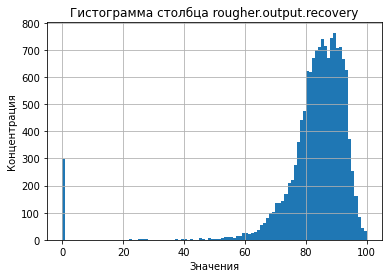

In [7]:
ror = data_train['rougher.output.recovery']
print(ror.describe())
ror.hist(bins = 100);
plt.title('Гистограмма столбца rougher.output.recovery')
plt.xlabel('Значения')
plt.ylabel('Концентрация');

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

На график стоит добавить подписи осей и название. Технические комментарии типа `<AxesSubplot:xlabel='datetime'>` стоит убирать - это можно сделать, поставив точку с запятой в последней строке кода в блоке визуализации, либо сделать последней строкой кода этого блока метод `plt.show()`.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Более 14к записей, значения принадлежат [0,100]. Распределение на гистограмме смещенно вправо. Видим явный вброс у нуля, попробуем исправить.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Здорово, что заметил нулевые значения - это явно какая-то ошибка. Ты пишешь про исправление, вероятно, подразумевая удаение - мысль правильная. Но реализации не увидел в проекте - давай добавим?
    
Также стоит проанализировать таким же образом второй целевой признак - вдруг там тоже нули будут?
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [1]:
data_train['final.output.recovery'].hist(bins = 100);
plt.title('Гистограмма столбца final.output.recovery')
plt.xlabel('Значения')
plt.ylabel('Концентрация');

NameError: name 'data_train' is not defined

Действительно, оба столбца с целевыми признаками содержут выбросы, которые я не удалил, так как не люблю я удалять почему-то, всегда кажется что все данные важны, хотя здесь явный случай, где это не играет нам на пользу :). В случае с ror мы должны убить значения около 0, в случае с for выделяются как в нуле, так и в 100, будет честно убрать их вместе.

In [9]:
data_train = data_train.loc[~data_train['final.output.recovery'].isin([100,0])]
data_train = data_train.loc[data_train['rougher.output.recovery'] != 0]
ror = data_train['rougher.output.recovery'] # закинем обновленные данные в переменную

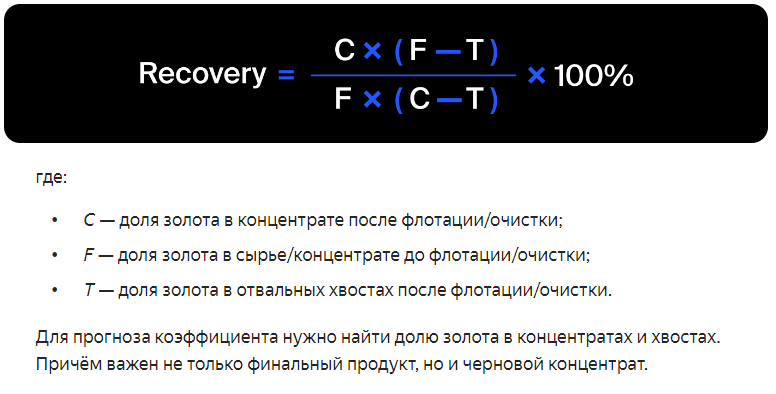

**Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака**

In [10]:
c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']
recovery = (c * (f - t)) / (f * (c - t)) * 100
print('Среднее значение коэфициента обогощения', recovery.mean())
print('МАЕ =', mean_absolute_error(ror, recovery))

Среднее значение коэфициента обогощения 84.49055641478938
МАЕ = 9.953346441714893e-15


**Несмотря на выбросы возле нуля, получили МАЕ-метрику стремящуюся к нулю, значит все в порядке.**

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Оценили `MAE` между исходным и расчётным значением эффективности обогащения и убедились, что эффективность обогащения рассчитана правильно - отлично!
</div>

**Посмотрим на признаки недоступные в тестовой выборке**

In [11]:
data_not_test = data_train.copy()
data_not_test = data_not_test.drop(columns=list(data_test.columns))
#data_not_test.info()
print(data_not_test.columns)
print(data_train.shape)
print(data_not_test.shape)

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

Не вошли следующие эллементы:
- финальные характеристики.параметры продукта.содержание различных химических эллементов
- первичная очистка.параметры продукта.содержание различных хим эллементов и хвост от них
- флотация.расчётные характеристики хим элементы в золоте
- флотация.параметры продукта.концентрация различных элементов
- флотация.параметры продукта.эффективность обогащения
- флотация.параметры продукта.хвосты
- вторичная очистка.параметры продукта.содержание различных хим эллементов хвост

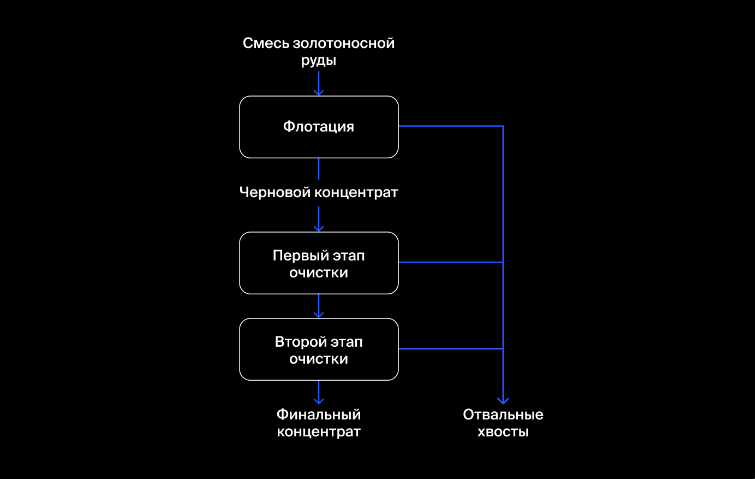

Судя по изображению в ходе технологического процесса эти показатели как-то вычисляются, вероятно, нам необходимо будет их предсказать или подсчитать. Точно можно сказать, что final.output.recovery - целевой признак (rougher.output.recovery тоже судя по постановке задачи).
Добавим их из исходного датасета в тестовый:

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Проанализировали разницу в признаках между выборками.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Как думаешь, почему в `train` есть признаки, которые недоступны в `test`?
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Предположу, что признаки недоступные в тест вызваны невозможностью их как-то предсказать, поскольку почти все признаки относятся к output - то есть их концентрацию и хвосты после основных процессов (флотации и этапов очистки), это фактические данные все же. 

In [12]:
data_test = data_test.merge(data[['final.output.recovery', 'rougher.output.recovery', 'date']], how='left', on='date')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В `test` добавили целевые признаки из `full`, используя дату как ключ при соединении - отлично!

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Здесь заканчивается стрктурный блок работы - стоит делать промежуточные выводы о проделанной работе, это довольно полезная практика, которая имеет большую ценность для получателя отчёта.
        
Достаточно будет двух-трёх тезисных предложений об основных шагах и полученных выводах.
        
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

**Вывод** предобработали данные, проверили на дубликаты, избавились от выбросов, изучили в целом технологический процесс на более глубоком уровне, ознакомившись с наименованиями столбцов, проверили recovery, плавно движемся к светлому будущему!

## Анализ данных

**Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишем выводы**

У нас есть 3 этапа с содержанием концентрации, и три типа химического вещества, соответственно, мы строим 3 графика, на каждой из которых изображаем 3 гистограммы для каждого элемента по этапно, либо 4 графика, где в зависимости от этапа выводим каждый химический элемент. Нагляднее будет первый, так как вряд ли мы собрались искать закономерности одного химического вещества от другого.

**То что подаем до флотации надо ли визуализировать? Там же руда, она вроде много, что содержит, хотя, не будет лишним, если что, снесу после ревью**

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Хвосты анализировать не нужно - только концентрацию. Все 4 этапа, кроме хвостов, выбраны верно - лишнее лучше удалить, чтобы не нагружать график.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

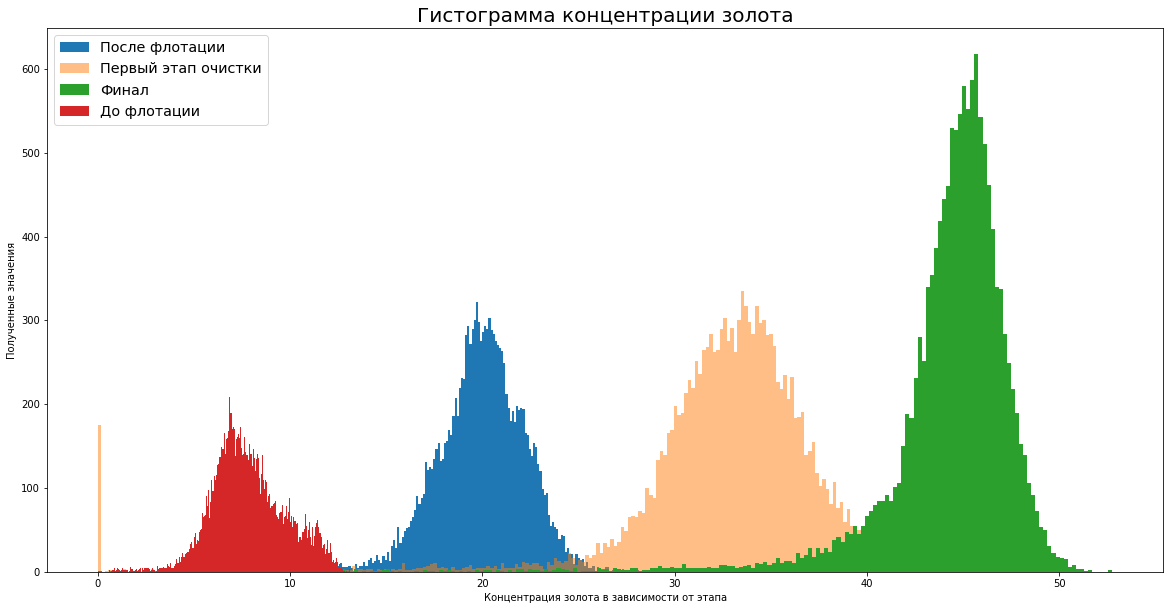

In [13]:
#data_train
#final.output.concentrate_au  
#primary_cleaner.output.concentrate_au
#rougher.output.concentrate_au  
plt.figure(figsize=[20,10])   
plt.hist(data_train['rougher.output.concentrate_au'], bins=250, label = 'После флотации')
plt.hist(data_train['primary_cleaner.output.concentrate_au'], bins=250, label = 'Первый этап очистки',alpha=0.5)
plt.hist(data_train['final.output.concentrate_au'], bins=250, label = 'Финал')
plt.hist(data_train['rougher.input.feed_au'], bins=250, label = 'До флотации')

plt.xlabel('Концентрация золота в зависимости от этапа')
plt.ylabel('Полученные значения')  
plt.legend(loc='upper left', fontsize='x-large')   
plt.title('Гистограмма концентрации золота', fontsize=20)
plt.show()

Наблюдаем, что хвост, состоящий из остатков продукта с низкой концентрацией ценных металлов, имеет наименьшую концентрацию, после идут показатели того, что мы подаем на вход флотации, затем после флотации, после очистки и наибольшее значение имеет финал, видимо, не зря стараемся такой технологический процесс создали, работает!!!

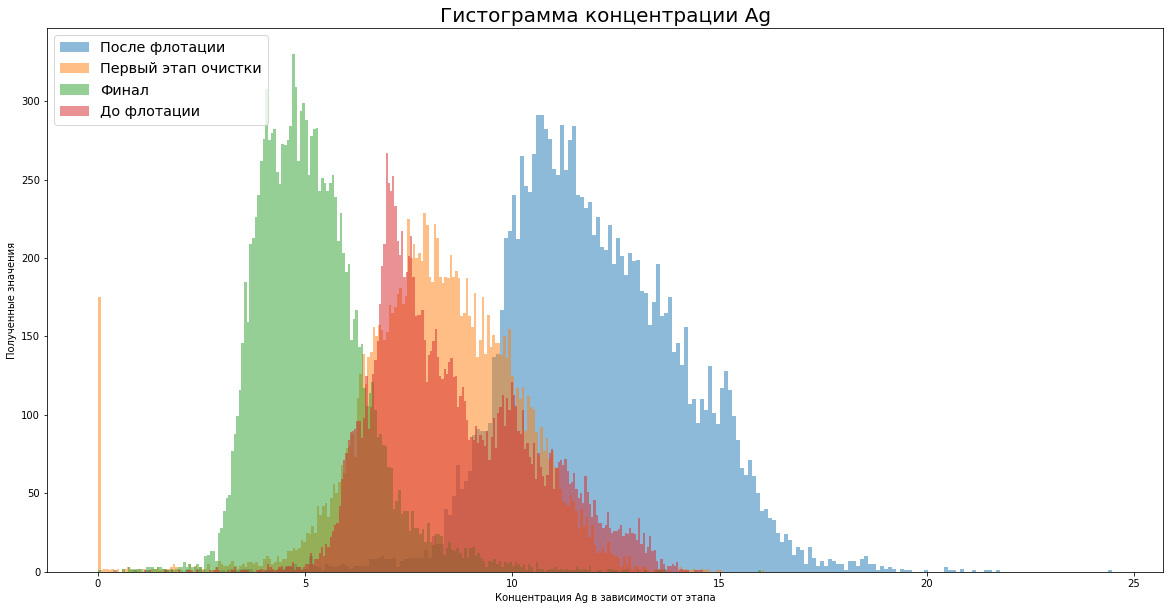

In [14]:
plt.figure(figsize=[20,10])   
plt.hist(data_train['rougher.output.concentrate_ag'], bins=250, label = 'После флотации',alpha=0.5)
plt.hist(data_train['primary_cleaner.output.concentrate_ag'], bins=250, label = 'Первый этап очистки',alpha=0.5)
plt.hist(data_train['final.output.concentrate_ag'], bins=250, label = 'Финал',alpha=0.5)
  
plt.hist(data_train['rougher.input.feed_ag'], bins=250, label = 'До флотации',alpha=0.5)

plt.xlabel('Концентрация Ag в зависимости от этапа')
plt.ylabel('Полученные значения')  
plt.legend(loc='upper left', fontsize='x-large')   
plt.title('Гистограмма концентрации Ag', fontsize=20)
plt.show()

График получился шакальный, не думал, что выборки друг на друга зайдут настолько, но в целом, есть закономерность, что пройдя путь от флотации до финала, его значения уменьшились, и хвост содержит в среднем гораздо больше именно Ag, чем золота, ну видимо поэтому от его обработки дальнейшей и отказываются.

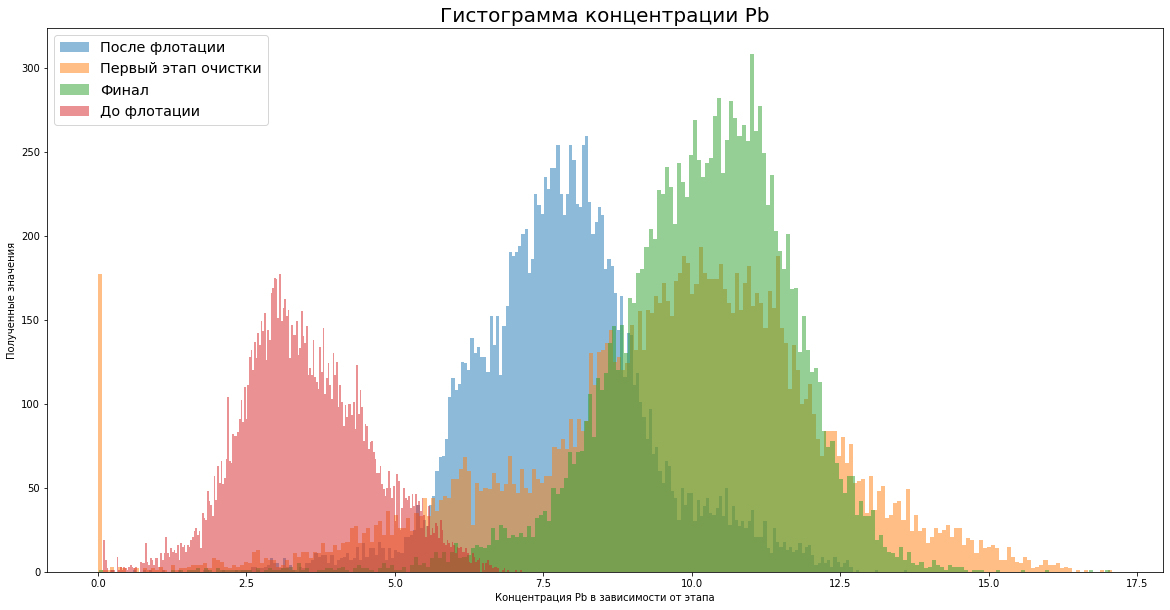

In [15]:
plt.figure(figsize=[20,10])   
plt.hist(data_train['rougher.output.concentrate_pb'], bins=250, label = 'После флотации',alpha=0.5)
plt.hist(data_train['primary_cleaner.output.concentrate_pb'], bins=250, label = 'Первый этап очистки',alpha=0.5)
plt.hist(data_train['final.output.concentrate_pb'], bins=250, label = 'Финал',alpha=0.5)
 
plt.hist(data_train['rougher.input.feed_pb'], bins=250, label = 'До флотации',alpha=0.5)

plt.xlabel('Концентрация Pb в зависимости от этапа')
plt.ylabel('Полученные значения')  
plt.legend(loc='upper left', fontsize='x-large')   
plt.title('Гистограмма концентрации Pb', fontsize=20)
plt.show()

**Построим второй вариант графиков, а то по этим, тяжело сказать что-то гениальное!**

Откажемся от хвоста, думаю он не несет смысловой нагрузки. Рассмотрим каждый этап и зависимость между элементами. Сохраним xlim и ylim для наглядности неизменными.

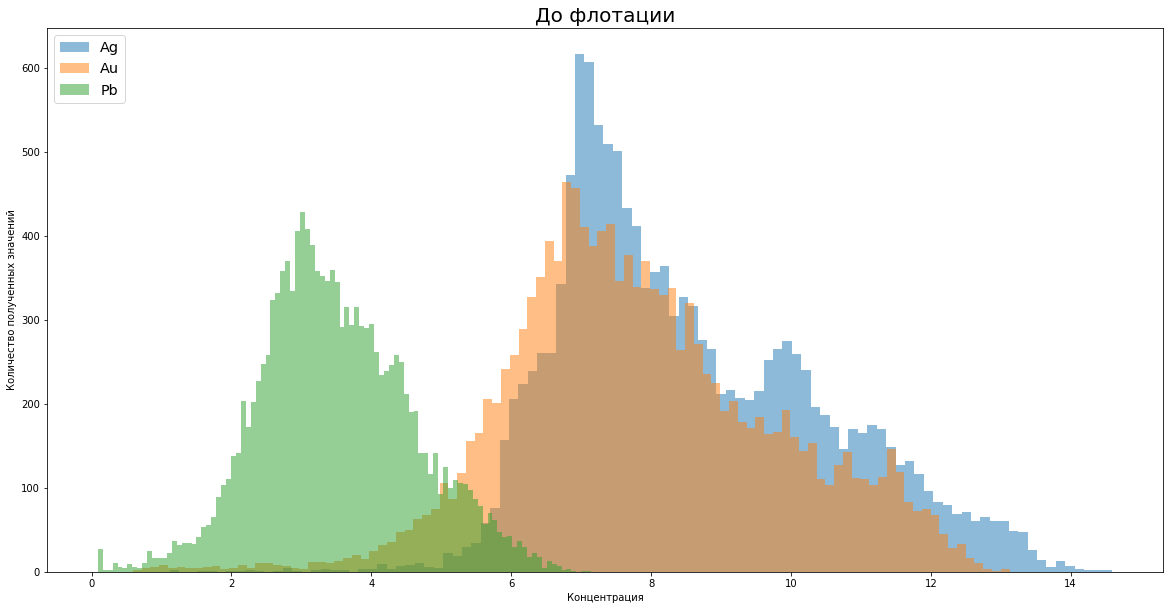

In [16]:
plt.figure(figsize=[20,10])   
plt.hist(data_train['rougher.input.feed_ag'], bins=100, label = 'Ag',alpha=0.5)
plt.hist(data_train['rougher.input.feed_au'], bins=100, label = 'Au',alpha=0.5)
plt.hist(data_train['rougher.input.feed_pb'], bins=100, label = 'Pb',alpha=0.5)
 
plt.xlabel('Концентрация')
plt.ylabel('Количество полученных значений')  
plt.legend(loc='upper left', fontsize='x-large')   
plt.title('До флотации', fontsize=20)
plt.show()

Изначально золота совсем нет, американская мечта далеко(

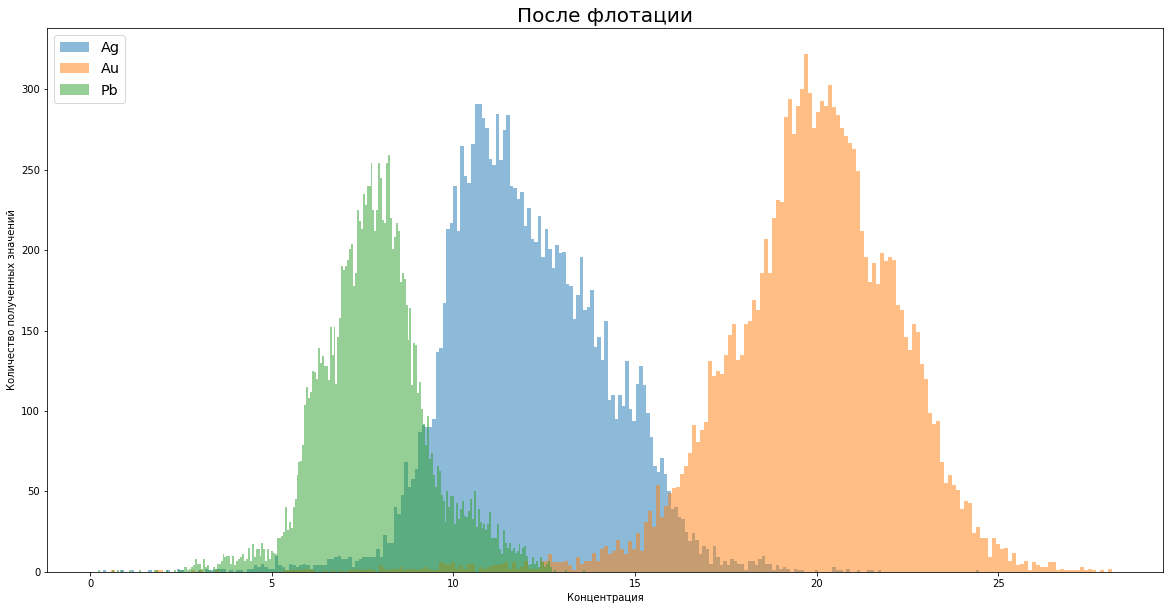

In [17]:
plt.figure(figsize=[20,10])   
plt.hist(data_train['rougher.output.concentrate_ag'], bins=250, label = 'Ag',alpha=0.5)
plt.hist(data_train['rougher.output.concentrate_au'], bins=250, label = 'Au',alpha=0.5)
plt.hist(data_train['rougher.output.concentrate_pb'], bins=250, label = 'Pb',alpha=0.5)

plt.xlabel('Концентрация')
plt.ylabel('Количество полученных значений')  
plt.legend(loc='upper left', fontsize='x-large')   
plt.title('После флотации', fontsize=20)
plt.show()

Флотация пошла напользу, золото хорошенько насытили и его количество возросло

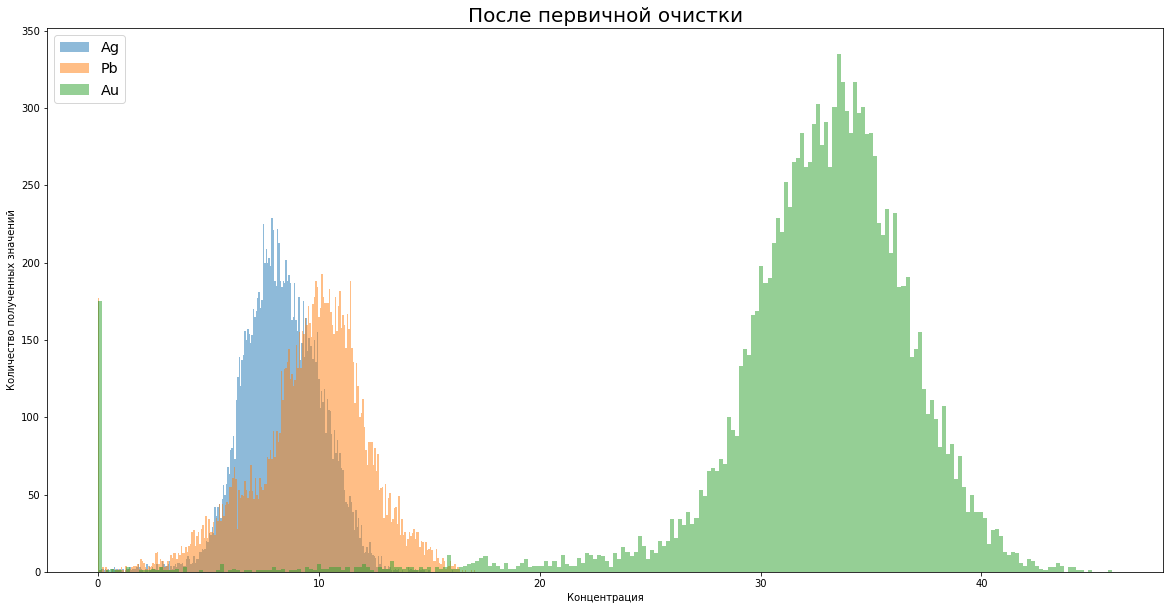

In [18]:
plt.figure(figsize=[20,10])   
plt.hist(data_train['primary_cleaner.output.concentrate_ag'], bins=250, label = 'Ag',alpha=0.5)
plt.hist(data_train['primary_cleaner.output.concentrate_pb'], bins=250, label = 'Pb',alpha=0.5)
plt.hist(data_train['primary_cleaner.output.concentrate_au'], bins=250, label = 'Au',alpha=0.5)
 
plt.xlabel('Концентрация')
plt.ylabel('Количество полученных значений')  
plt.legend(loc='upper left', fontsize='x-large')   
plt.title('После первичной очистки', fontsize=20)
plt.show()

Много золота хорошо, но больше еще лучше!

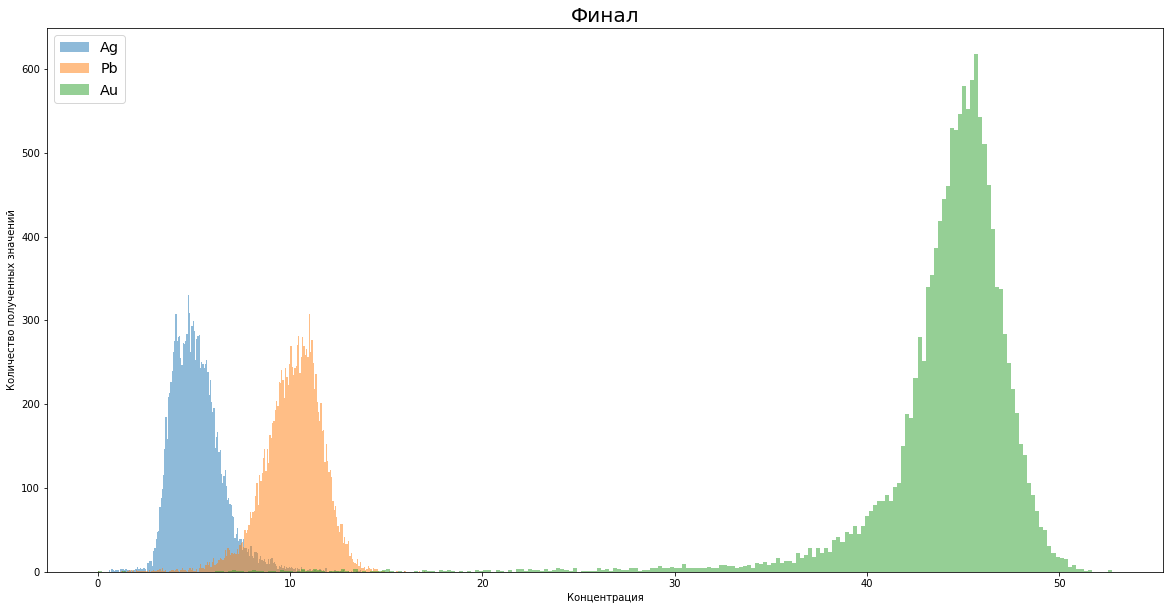

In [19]:
plt.figure(figsize=[20,10])   
plt.hist(data_train['final.output.concentrate_ag'], bins=250, label = 'Ag',alpha=0.5)
plt.hist(data_train['final.output.concentrate_pb'], bins=250, label = 'Pb',alpha=0.5)
plt.hist(data_train['final.output.concentrate_au'], bins=250, label = 'Au',alpha=0.5)

plt.xlabel('Концентрация')
plt.ylabel('Количество полученных значений')  
plt.legend(loc='upper left', fontsize='x-large')   
plt.title('Финал', fontsize=20)
plt.show()

Закрепили результат, постепенно наблюдаем, как золото растет от этапа к этапу, что и требовалось доказать, процесс себя оправдывает!

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Исследована концентрация металлов на разных стадиях обработки, проанализирована динамика концентрации в зависимости от этапа техпроцесса - отлично, тут всё верно.
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Ограничения по осям стоит убрать: нулевые значения стоит сделать более заметными, чтобы сюр происходящего был чуть более заметным.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Снес ограничения и выбросы в нуле ослепили мое мировозрение, будем убирать по классике, в ручную, хотя ходят слухи на стаковерфлоу, что можно написать функцию, которая по квантилям бы выкидывала все приколы не нужные, я оставлю ее тут, когда буду переделывать проект перед заливом, оформлю, полезная штука, но Марина уничтожит и переиграет, если не уложусь в дедлайн. Однако у нас очевиден 0, который явно выбивается и без квантилей
По результатам явные выбросы у: primary_cleaner.output.concentrate_au, primary_cleaner.output.concentrate_ag, primary_cleaner.output.concentrate_pb, забьем их насмерть

**Обновлено** о мой бог, я снес в нуле, но графикам это мало помогло, видимо правда нужно по квантилю убрать, там похоже флота близких к нулю очень много, снесем по нижнему квантилю

In [20]:
#def kill_emissions(data,str(column)): # переписал, не проверял на работоспособность, !узнать работает ли привод к тд в параметрах функции!)
    #q_low = data[column].quantile(0.01) # попробовать через ввода столбца отдельным параметром, а то какой колхоз
    #q_hi  = data[column].quantile(0.99)

    #data = data[(df[column] < q_hi) & (data[column] > q_low)]

In [21]:
data_train = data_train[data_train['primary_cleaner.output.concentrate_au'] > data_train['primary_cleaner.output.concentrate_au'].quantile(0.01)]
data_train = data_train[data_train['primary_cleaner.output.concentrate_ag'] > data_train['primary_cleaner.output.concentrate_ag'].quantile(0.01)]
data_train = data_train[data_train['primary_cleaner.output.concentrate_pb'] > data_train['primary_cleaner.output.concentrate_pb'].quantile(0.01)]


Выглядеть стало гораздо прекраснее!

**Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.**

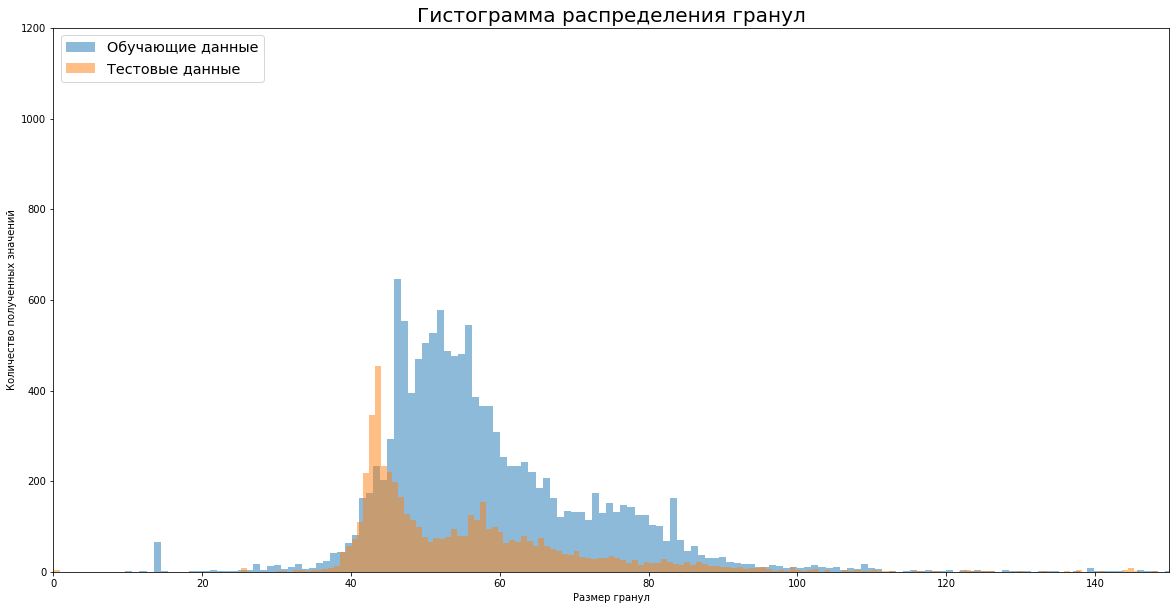

In [22]:
plt.figure(figsize=[20,10])
plt.hist(data_train['rougher.input.feed_size'], bins=500, label = 'Обучающие данные', alpha=0.5)
plt.hist(data_test['rougher.input.feed_size'], bins=500, label = 'Тестовые данные', alpha=0.5)
plt.xlim([0, 150])
plt.ylim([0, 1200])
plt.xlabel("Размер гранул")
plt.ylabel("Количество полученных значений")
plt.legend(loc='upper left', fontsize='x-large')
plt.title('Гистограмма распределения гранул', fontsize=20)
plt.show()


Заверните гистограмму, мне и моему сыну тоже... Очевидно, что из обучающей выборки чаще встретим все значения, ведь она в три раза больше!

Гистограммы в этом плане не помощник, необходимо знать плотность распределения, для этого обратимся к displot - диаграмме плотности распределения, которая поможет понять, насколько сильно отличаются размеры гранул.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Гистограмму этому господину за мой счёт!
</div>

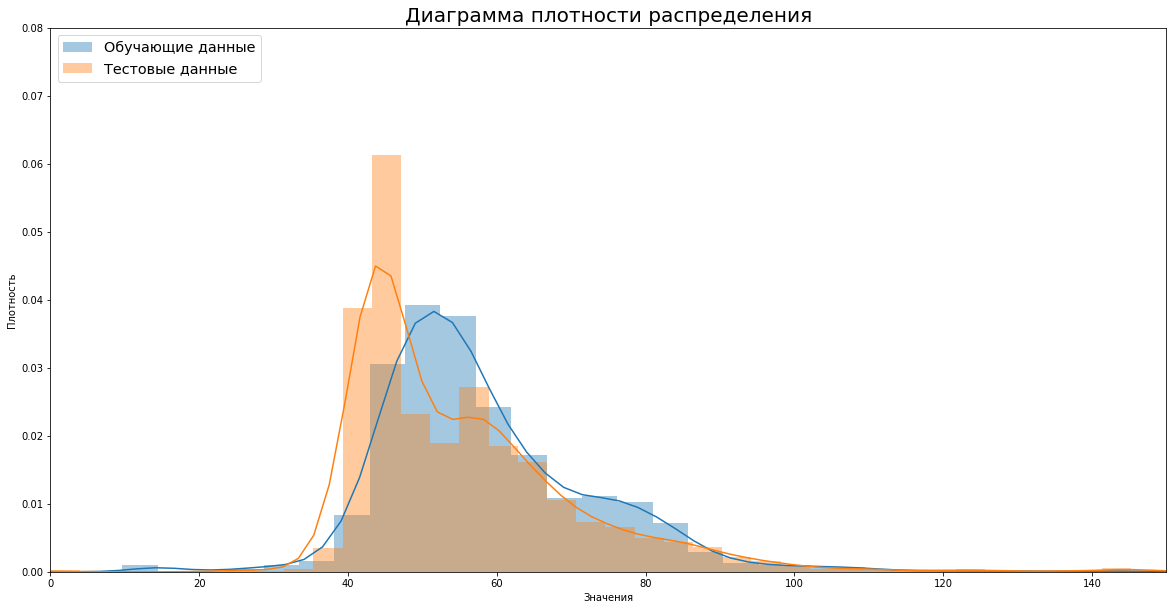

In [23]:
plt.figure(figsize=[20,10])
sns.distplot(data_train['rougher.input.feed_size'],label = 'Обучающие данные', bins=100)
sns.distplot(data_test['rougher.input.feed_size'], label = 'Тестовые данные', bins=100)
plt.xlim([0, 150])
plt.ylim([0, 0.08])
plt.xlabel("Значения")
plt.ylabel("Плотность")
plt.legend(loc='upper left', fontsize='x-large')
plt.title('Диаграмма плотности распределения', fontsize=20)
plt.show()

Распределение плотности почти идентичное, значит можно смело за работу!

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Сравнили размеры гранул сырья на обучающей и тесовой выборках для этапа `rougher.input.feed_size` - отлично, распределения между выборками действительно схожи, следовательно модель будет корректно работать.
    
Респект за график плотности - то, что нужно для непрерывных переменных!
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Распределение также стоит исследовать на этапе `primary_cleaner.input.feed_size`.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Глянем этап после первичной очистки!

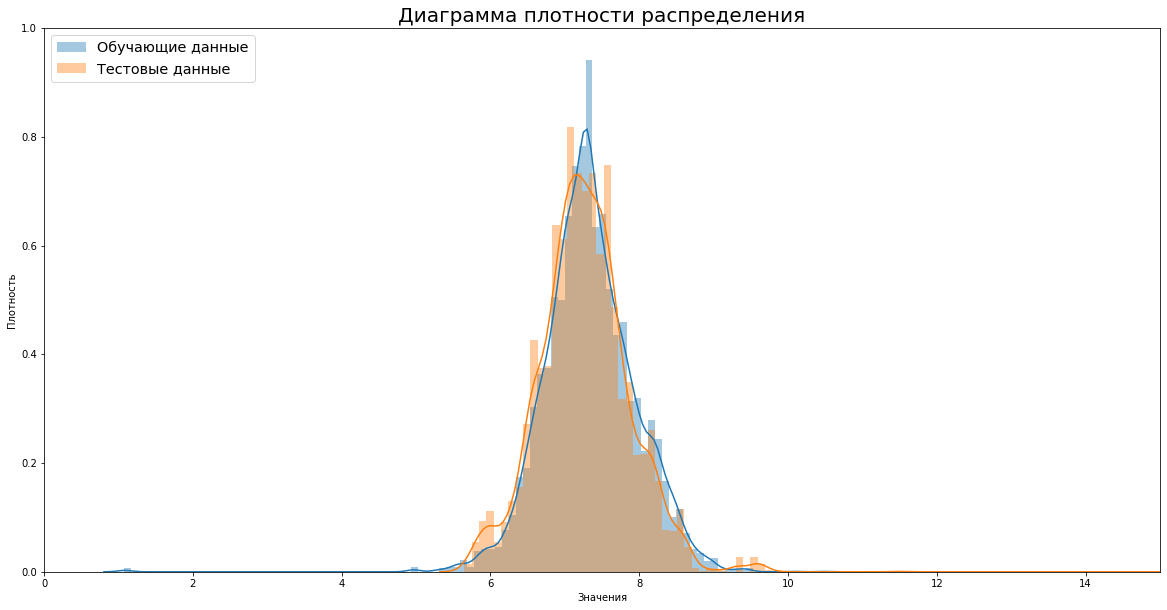

In [24]:
plt.figure(figsize=[20,10])
sns.distplot(data_train['primary_cleaner.input.feed_size'],label = 'Обучающие данные', bins=100)
sns.distplot(data_test['primary_cleaner.input.feed_size'], label = 'Тестовые данные', bins=100)
plt.xlim([0, 15])
plt.ylim([0, 1])
plt.xlabel("Значения")
plt.ylabel("Плотность")
plt.legend(loc='upper left', fontsize='x-large')
plt.title('Диаграмма плотности распределения', fontsize=20)
plt.show()

Ситуация примерно одинаковая, значит можно смело двигаться дальше!

**Исследуем суммарную концентрацию всех веществ на разных стадиях**

Так как я смотрел выше на концентрацию определенных веществ от стадии к стадии, то сейчас буду анализировать суммарный объем, но задача ставится немного непонятно, суммарную это всех или каждого по отдельности:?

Воспользуемся функцией для подсчета общего количества концентрата

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Сумма концентраций всех металлов на каждом этапе - у тебя всё верно.
</div>

In [25]:
#rougher.input.feed_ag
#rougher.output.concentrate_au
#final.output.concentrate_ag
def concentration(data_train,ag,au,pb,sol):
    ag1=data_train[ag]
    au1=data_train[au]
    pb1=data_train[pb]
    sol1=data_train[sol]
    final = ag1 + au1 + pb1 + sol1
    plt.figure(figsize=(20,10))
    final.plot.hist(bins=200)
    plt.title('Суммарная концентрация')
    plt.xlabel('Значение')
    plt.ylabel('Количество значений')
    print(final.describe())

**Сырье**

count    13277.000000
mean        56.398887
std          6.672904
min          9.514401
25%         52.678596
50%         56.663022
75%         60.797077
max         74.458253
dtype: float64


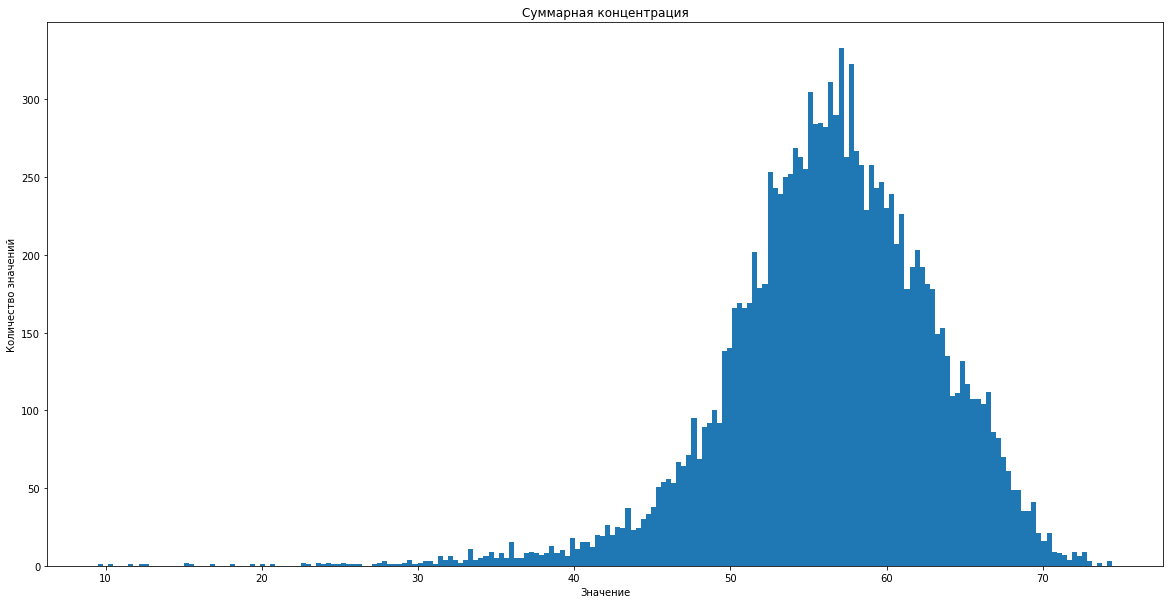

In [26]:
concentration(data_train,'rougher.input.feed_ag','rougher.input.feed_au','rougher.input.feed_pb','rougher.input.feed_sol')

count    13277.000000
mean        68.795877
std          7.734025
min          9.445924
25%         65.410163
50%         69.382458
75%         73.535668
max         88.140119
dtype: float64


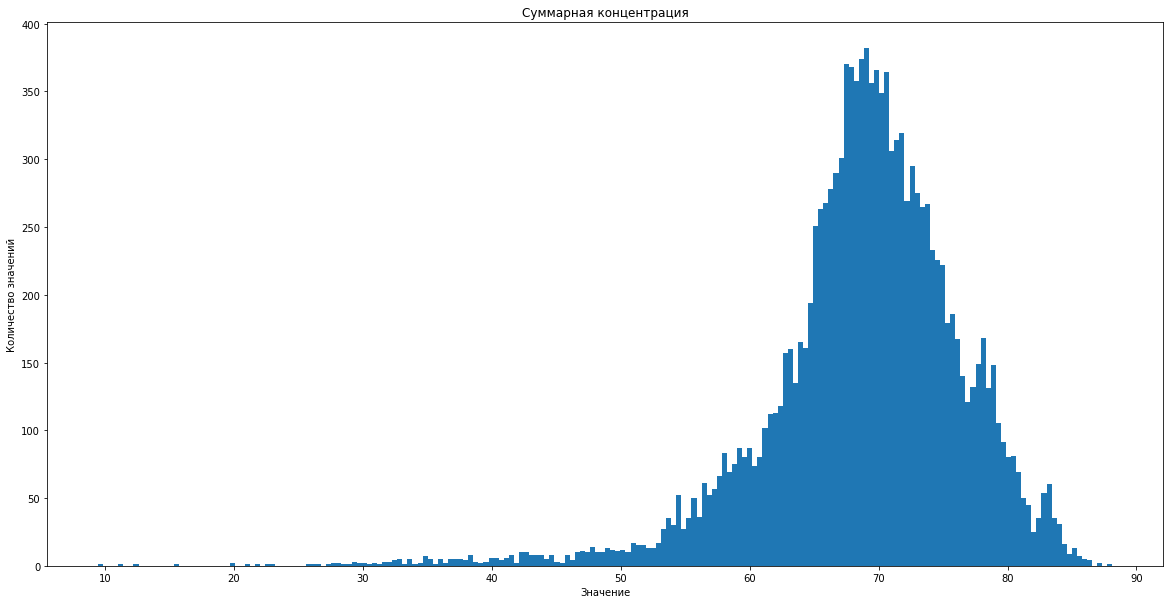

In [27]:
concentration(data_train,'rougher.output.concentrate_au','rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_sol')

count    13277.000000
mean        68.840235
std          4.928864
min          0.040000
25%         67.623382
50%         69.178139
75%         71.002895
max         80.210644
dtype: float64


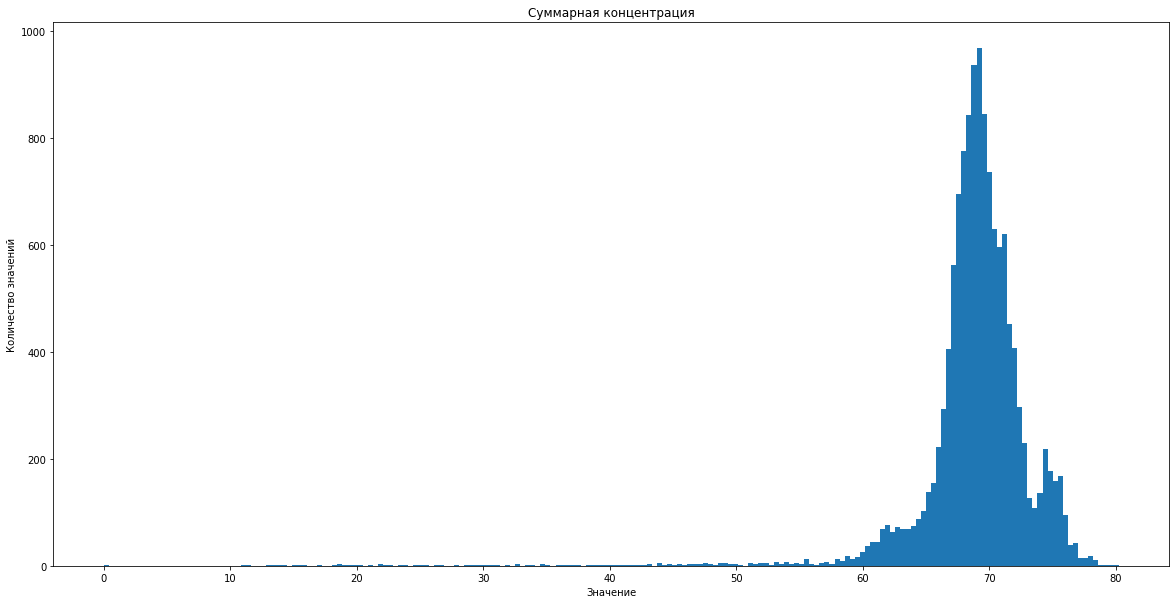

In [28]:
concentration(data_train,'final.output.concentrate_ag','final.output.concentrate_au','final.output.concentrate_pb','final.output.concentrate_sol')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Исследована суммарная концентрация металлов на разных стадиях техпроцесса - отлично!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

На твоих графиках отчётливо виден столбец в районе нулевых значений. Как думаешь, нулевое и околонулевое значение концентации (в т.ч. суммарной) - это норма, или у нас оборудование сбойнуло, и эти аномалии надо выбосить?
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Сомневаюсь, что это может быть вариации нормы, моих знаний в нефтепереработке недостаточно, чтобы знать это наверняка, но для обывателя случай с кривым оборудованием кажется реалистичнее, поэтому я их убил

**Вывод**

- Построили графики. Очень много графиков, какие-то точно не нужны, но постановка задачи немного размытая, если что - снесем их.
- Узнали что размеры гранул из обучающей выборки схожи с размером гранул из тестовой.
- Проследили за изменением количества руды от начала и до конца процесса.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Есть промежуточный вывод - порядок!

## Модель

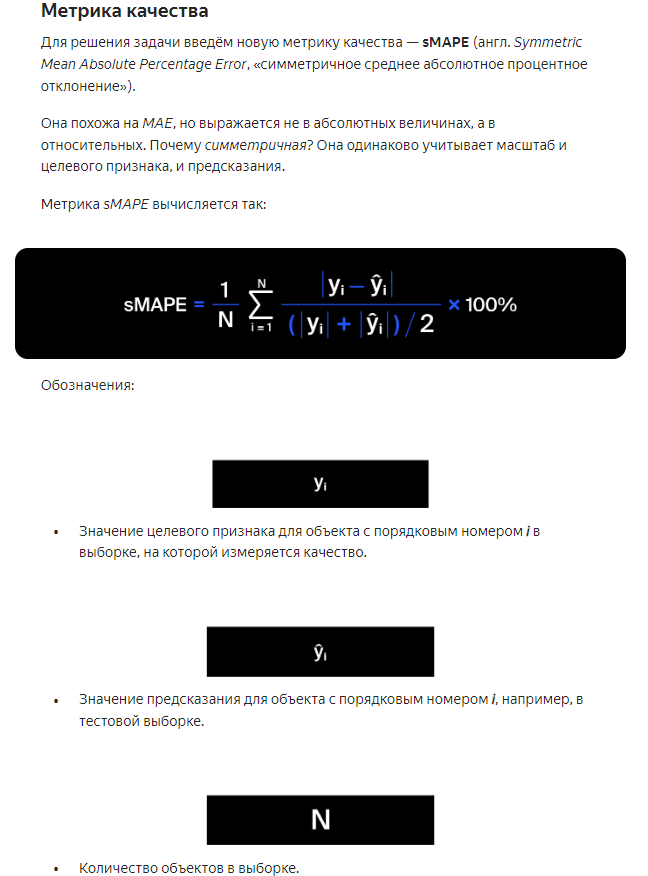
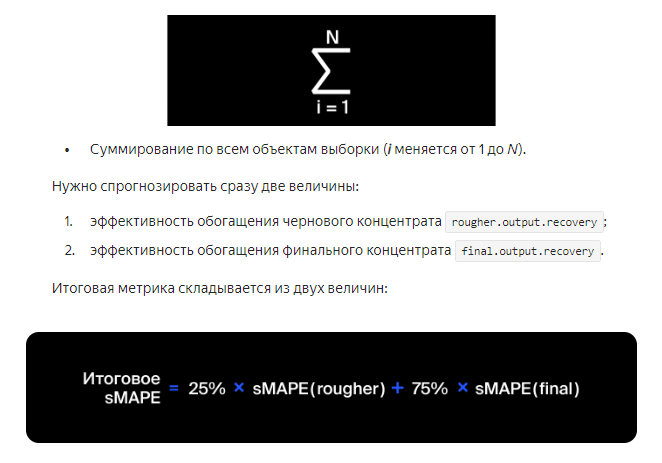

Создадим функции для упрощения работы:

In [29]:
def sMAPE(target,predict): # функция рассчета sMAPE по формуле
    return np.mean(abs(target - predict)/((abs(target)+abs(predict))/2))*100

In [30]:
def final_sMAPE(sMAPE_rougher,sMAPE_final):  # функция рассчета финального sMAPE по формуле
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Есть функции для частного и взвешенного `sMAPE`, а также пользовательский скорринг для кросс-валидации - супер!
</div>

Количество столюцов в выборках разняться, необходимо сохранить лишь те, что встречаются и в обучающей, и в тестовой

In [31]:
target_columns = list(reversed(list(data_test.columns)[-2:])) # последние два столбца, что мерджили в начале берем за целевые признаки
features_columns = list(data_test.columns)[1:-2] # все остальное кроме целевых и айдишников - дат

In [32]:
features_train = data_train[features_columns] # обучающие фичи
target_train = data_train[target_columns] # обучающие таргеты
features_test = data_test[features_columns] # тестовые фичи
target_test = data_test[target_columns] # тестовый таргет
print(features_train.shape) 
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(13277, 52)
(13277, 2)
(5290, 52)
(5290, 2)


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Синхронизировали тренировочную и тестовую выборки по набору признаков - хорошо!
</div>

**Линейная регрессия**

Формула рассчета sMAPE-метрики библиотеки sklearn.

In [33]:
smape_scorer = make_scorer(sMAPE, greater_is_better=False)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Есть пользовательский скорринг для кросс-валидации - супер!
</div>

В первый раз я устанавлиал значение сv = 5, но по итогу в случайном лесе начинался лютый хардкор компиляции на полчаса, а хочется все модели в одни рамки загнать, для чистоты эксперемента. Надеюсь в точности мы не сильно потеряем, теперь для кросс-валидации выборки бьются на 4 части, 3/4 под обучение, 1/4 в качестве тестовой.
Вычислим среднее значение метрики sMape для rougher.output.recovery и final.output.recovery, а также найдем финальную с помощью созданной функции. Кроссвалидация проводится с помощью cross_val_score из библиотеки sklearn, на вход которой подается модель, обучающие фичи и таргеты, метрика подсчета, а так же параметр cv, который отвечает за разбиение обучающей выборки на более мелкие, для обучения обучения берется n-1 этих выборок и после все это проверяется на тестовой, под которую выделяется 1 оставшаяся выборка.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 4 фолда - окей. 3 было бы уже маловато, но для учебного проекта ускорения ради можно было бы и тремя ограничиться.
    
Также подкину пару советов по оптимизации жизни:
1. Можно настроить параметр `n_jobs=-1`, чтобы для вычислений использовались все доступные ядра - это ускорит процесс.
2. Можно настроить параметр `verbose=10`, чтобы инструмент взаимодействовал с логом и выдавал сообщения о прогрессе обучения - так мы будем понимать, что процесс идёт, а не что, например, у нас упало ядро, и процесс завис.
</div>

In [34]:
model_lrr = LinearRegression()
scores_lrr = cross_val_score(model_lrr, features_train, target_train['rougher.output.recovery'], scoring = smape_scorer, cv = 4)
smape_rougher = np.mean(abs(scores_lrr))
print('Средняя метрики sMape_rougher', smape_rougher)

Средняя метрики sMape_rougher 7.723980449585195


In [35]:
scores_lrf = cross_val_score(model_lrr, features_train, target_train['final.output.recovery'], scoring = smape_scorer,cv = 4)
smape_final = np.mean(abs(scores_lrf))
print('Средняя метрики sMape_final', smape_final)

Средняя метрики sMape_final 10.275835942314263


In [36]:
itog_sMAPE = final_sMAPE(smape_rougher, smape_final)
print('Средняя итоговая оценка качества модели sMape ', itog_sMAPE)

Средняя итоговая оценка качества модели sMape  9.637872069131996


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Линейную регрессию оценини на кросс-валидации - отлично!
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Переменная с именем `itogi` - это, конечно, искусство, которые каждый художник видит по-своему, но в отрасли программирования есть стандарт, согласно которому переменные, функции, классы и прочие инструмены нужно именовать англоязычными терминами. Твои `itogi` запросто поставят в ступор англоговорящего коллегу по проекту и вызовут вопросы у русскоговорящих:) Поэтому импортное `total` впишется лучше:)
        
</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Торжественно обязуюсь такого больше не исполнять :D
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Окей:)

**Дерево решений**

In [37]:
mn = 101
best_depth = 21
for i in range (1,20):
    model_dtr = DecisionTreeRegressor(random_state=12345, max_depth = i)
    model_dtr.fit(features_train, target_train['rougher.output.recovery'])
    scores_dtr = cross_val_score(model_dtr, features_train, target_train['rougher.output.recovery'], scoring = smape_scorer, 
                                 cv = 4)
    smape_rougher = np.mean(abs(scores_dtr))
    print('Средняя метрики smape_rougher', smape_rougher)
    if mn > smape_rougher:
        mn = smape_rougher
        best_depth = i
smape_rougher = mn
print()
print('Лучшее значение метрики sMAPE:', smape_rougher, 'при глубине дерева', best_depth)

Средняя метрики smape_rougher 9.08115963421176
Средняя метрики smape_rougher 8.465859582775412
Средняя метрики smape_rougher 8.215852895793372
Средняя метрики smape_rougher 7.941662591487353
Средняя метрики smape_rougher 8.322682797117107
Средняя метрики smape_rougher 8.344001863931256
Средняя метрики smape_rougher 8.730461531025822
Средняя метрики smape_rougher 8.706734628529826
Средняя метрики smape_rougher 9.00292478474974
Средняя метрики smape_rougher 8.886509548515624
Средняя метрики smape_rougher 9.296819795895935
Средняя метрики smape_rougher 9.457792009498801
Средняя метрики smape_rougher 9.196494959177102
Средняя метрики smape_rougher 9.759198332956192
Средняя метрики smape_rougher 9.867239081716743
Средняя метрики smape_rougher 9.93667679675388
Средняя метрики smape_rougher 9.873049625154565
Средняя метрики smape_rougher 9.940470493366917
Средняя метрики smape_rougher 9.695939939033916

Лучшее значение метрики sMAPE: 7.941662591487353 при глубине дерева 4


Лучшая глубина дерева для среднего метрики smape получено при 4!

In [38]:
mn = 101
best_depth = 21
for i in range (1,20):
    model_dtf = DecisionTreeRegressor(random_state=12345, max_depth = i)
    model_dtf.fit(features_train, target_train['final.output.recovery'])
    scores_dtf = cross_val_score(model_dtf, features_train, target_train['final.output.recovery'], scoring = smape_scorer,
                                              cv = 4)
    smape_final = np.mean(abs(scores_dtf))
    print('Среднее метрики smape_final', smape_final)
    if mn > smape_final:
        mn = smape_final
        best_depth = i
smape_final = mn
print()
print('Лучшее значение метрики sMAPE:', smape_final, 'при глубине дерева', best_depth)

Среднее метрики smape_final 10.202459894860121
Среднее метрики smape_final 9.658996502360313
Среднее метрики smape_final 10.107532960045845
Среднее метрики smape_final 10.482286346855112
Среднее метрики smape_final 10.376527565487695
Среднее метрики smape_final 10.906755143580114
Среднее метрики smape_final 11.11694212527967
Среднее метрики smape_final 11.492021788251822
Среднее метрики smape_final 11.497499601784964
Среднее метрики smape_final 12.513559239050078
Среднее метрики smape_final 13.284464943312987
Среднее метрики smape_final 13.074767997918745
Среднее метрики smape_final 14.134317647115466
Среднее метрики smape_final 14.429007847390505
Среднее метрики smape_final 14.475678889940975
Среднее метрики smape_final 15.116217203964577
Среднее метрики smape_final 15.697822316582311
Среднее метрики smape_final 15.41314685366363
Среднее метрики smape_final 15.324331271451682

Лучшее значение метрики sMAPE: 9.658996502360313 при глубине дерева 2


Лучшая глубина дерева для среднего метрики smape получено при 2!

In [39]:
itog_sMAPE = final_sMAPE(smape_rougher, smape_final)
print('Средняя итоговая оценка качества модели sMape', itog_sMAPE)

Средняя итоговая оценка качества модели sMape 9.229663024642074


И это явно лучше, чем в линейной регрессии!

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Для решающего дерева оптимизировали гиперпараметры и оценили модель на кросс-валидации - отлично!
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

В догонку к лучшему значению метрики стоит вывести на экран значения гиперпараметров, при которых метрика была получена: искать глазами будет сложно, когда гиперпараметров будет много.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Перед выполнением следующего блока, судя по сообщениям на Пачке, необходимо обратиться к GridSearchCV. Когда я выполнял проект на первых парах я столкнулся с тем, что задал огромный интервал и не ожидал, что настолько доооооолго будет работать гридсерч особенно для случайного леса, скорее всего дело в том, что внутри гридсерча происходит обучение и проверка на тестовой выборке (которая в случайном лесе обучается на двух циклах вложенных с изменением гиперпараметров, то есть ооооочень много обучения).
Но с небольшими интервалами, да и на дереве решений, все работает лучше и приколдеснее, гораздо прекраснее, чем танцы с бубнами и циклами

In [40]:
%%time
model_dtr = DecisionTreeRegressor(random_state=12345)
hyper = {'max_depth': [x for x in range(1, 10, 1)]}
grid_dtr = GridSearchCV(model_dtr, hyper, cv=4, scoring=smape_scorer)
grid_dtr.fit(features_train, target_train['rougher.output.recovery'])
print('Лучшая глубина дерева:', grid_dtr.best_params_)
print('smape_rougher', abs(grid_dtr.best_score_))

Лучшая глубина дерева: {'max_depth': 4}
smape_rougher 7.941662591487353
CPU times: user 9.73 s, sys: 4.01 ms, total: 9.74 s
Wall time: 9.75 s


Без цикла, в четыре строчки, да, гридсерч заслуживает почитания и обожания! Повторим то же самое для файнала. Значение получил то же самое, но со знаком минус, возьмем под модуль

In [41]:
%%time
model_dtf = DecisionTreeRegressor(random_state=12345)
hyper = {'max_depth': [x for x in range(1, 10, 1)]}
grid_dtf = GridSearchCV(model_dtf, hyper, cv=4, scoring=smape_scorer)
grid_dtf.fit(features_train, target_train['final.output.recovery'])
print('Лучшая глубина дерева:',grid_dtf.best_params_)
print('smape_rougher', abs(grid_dtf.best_score_))

Лучшая глубина дерева: {'max_depth': 2}
smape_rougher 9.658996502360313
CPU times: user 11.1 s, sys: 15.7 ms, total: 11.2 s
Wall time: 11.2 s


In [42]:
# вычислим итоговую оценку dtree_smape_total
itog_sMAPE = final_sMAPE(abs(grid_dtr.best_score_), abs(grid_dtf.best_score_))
print('Средняя итоговая оценка качества модели dtree_smape_total', itog_sMAPE)

Средняя итоговая оценка качества модели dtree_smape_total 9.229663024642074


Видим, что итоговая оценка не изменилась, но изменилась жизнь аналитика данных, он счастлив, что был занят не писаниной, а освободил времени для главного - аналитики! Убедились, что подбор лучших гиперпараметров через гридсерч работает, как нужно, в следующем блоке будем работать только через него

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> `GridSearchCV` действительно лучше, чем `cross_val_score` и цикл. Для ускорения оставил пару советов выше.
    
Также можно использовать `RandomizedSearchCV` - работает ровно так же, но `GridSearchCV` перебирает сетку параметров с начала и до конца, а `RandomizedSearchCV` исследует случайные комбинации в пределах заданного количества итераций. Точность может быть меньше, но работать будет явно быстрее.
    
Также глубина 20 (по крайней границе) - довольно высокое значение: толку не будет, так как дерево будет переобученным, а вот время на обучение увеличивается в разы.
</div>

**Случайный лес**

In [43]:
%%time
model_rfrr = RandomForestRegressor(random_state=12345)
hyper = { 'max_depth': [x for x in range(1, 4, 1)],
               'n_estimators': [x for x in range(10, 40, 4)]
             }
grid_rfrr = GridSearchCV(model_rfrr, hyper, cv=4, scoring=smape_scorer)
grid_rfrr.fit(features_train, target_train['rougher.output.recovery'])
print('Лучшие параметры: ', grid_rfrr.best_params_)
print('smape_rougher', abs(grid_rfrr.best_score_))

Лучшие параметры:  {'max_depth': 3, 'n_estimators': 38}
smape_rougher 7.570662805246763
CPU times: user 2min 53s, sys: 324 ms, total: 2min 53s
Wall time: 2min 54s


In [44]:
%%time
model_rfrf = RandomForestRegressor(random_state=12345)
hyper = { 'max_depth': [x for x in range(1, 4, 1)],
               'n_estimators': [x for x in range(10,40,4)]
             }
grid_rfrf = GridSearchCV(model_rfrf, hyper, cv=4, scoring=smape_scorer)
grid_rfrf.fit(features_train, target_train['final.output.recovery'])
print('Лучшие параметры: ', grid_rfrf.best_params_)
print('smape_rougher', abs(grid_rfrf.best_score_))

Лучшие параметры:  {'max_depth': 2, 'n_estimators': 10}
smape_rougher 9.32192987965208
CPU times: user 2min 49s, sys: 152 ms, total: 2min 49s
Wall time: 2min 49s


In [45]:
itog_sMAPE = final_sMAPE(abs(grid_rfrr.best_score_), abs(grid_rfrf.best_score_))
print('Средняя итоговая оценка качества модели smape_rf_total', itog_sMAPE)

Средняя итоговая оценка качества модели smape_rf_total 8.88411311105075


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Для случайного леса оптимизировали гиперпараметры и оценили модель на кросс-валидации - отлично!
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Для гиперапараметра `n_estimators` оценивается очень короткая последовательность: по-настоящему этот алгоритм раскрывается при большом количестве деревьев, поэтому стоит увеличить их количество. Шаг тоже можно сделать выше.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Лучшая модель по результатам исследования оказался случайный лес со следующими параметрами:
- для rougher.output.recovery {'n_estimators': 3, 'max_depth': 38}
- для final.output.recovery {'n_estimators': 2, 'max_depth': 10}

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Лучшую модель выбрали - отлично!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Выводы и метрики чуть изменятся после устранения замечаний выше - стоит скорректировать. Также не стоит хранить весь лог работы над проектом - в нём можно запутаться. Оставляй только актуальные выводы.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

**Проверка лучшей модели на тестовых данных**

In [46]:
final_model_r = RandomForestRegressor(random_state=12345,max_depth = 3, n_estimators = 38)
final_model_r.fit(features_train, target_train['rougher.output.recovery'])
predict_roe_test = final_model_r.predict(features_test)

final_model_f = RandomForestRegressor(random_state=12345,max_depth = 2, n_estimators = 10)
final_model_f.fit(features_train, target_train['final.output.recovery'])
predict_fin_test = final_model_f.predict(features_test)

smape_rou = sMAPE(target_test['rougher.output.recovery'], predict_roe_test)
smape_fin = sMAPE(target_test['final.output.recovery'], predict_fin_test)
itog_test = final_sMAPE(smape_rou,smape_fin)
    
print(itog_test)

9.003836967029454


Рандомайздсерч хоть и хорош в плане производительности, но случайности не случайны, и за них надо платить, пришлось потратить очень много времени, чтобы найти подходящий рандомсерч (сижу уже второй час), чтобы победить константную модель:( Лучше было бы использовать гридсерч, хоть и не на больших интервалах

Я провел 2 часа в поисках но не нашел, я возвращаюсь к гридсерчу, пускай он будет долгим и мучительным на пару минут, но что поделать, проект то надо сдать!

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Лучшую модель протестировали на тестовой выборке - отличный itog:)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Очень важно также проверить лучшую модель на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу - вдруг окажется, что не было бы большого смысла заниматься созданием новых признаков, тюнингом и кросс-валидацией моделей, если можно было бы просто предсказывать среднее значение тренировочной выборки? 
    
В качестве константной модели можно использовать `DummyRegressor` (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) -  эта модель как раз создана для генерирования константных предсказаний.
    
Важно, чтобы результат тестирования нашей модели на тествой выборке был лучше, чем результат константной модели - в противном случае наша модель является бесполезной, так как все наши усилия над проектом не принесли результата, а можель, просто предсказывющая среднее на `train`, делает нашу работу лучше.
        </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

**DummyRegressor**

In [47]:
model_drr = DummyRegressor(strategy='mean')
model_drr.fit(features_train, target_train['rougher.output.recovery'])
predict_drr = model_drr.predict(features_test)

model_drf = DummyRegressor(strategy='mean')
model_drf.fit(features_train, target_train['final.output.recovery'])
predict_drf = model_drf.predict(features_test)


smape_rou = sMAPE(target_test['rougher.output.recovery'], predict_drr)
smape_fin = sMAPE(target_test['final.output.recovery'], predict_drf)
check_const = final_sMAPE(smape_rou,smape_fin)
print(check_const)

9.829096649757766


Наша модель показала результат лучше, ура!

**Вывод по теме:**
- Выполнили предобработку 
- Проверили, что эффективность обогащения рассчитана правильно
- Изучили отличные столбцы в тестовых и обучающих выборках
- Ислледовали концентрацию всего, чего только могли, относительно всего, чего только могли...
- Изучили размер гранул, пришли к выводу, что данные тестовой выборки вполне себе приближены к обучающей и можно работать дальше
- Исследованы суммарные концентрации
- Написаны функции вычисления итогового сМАПА
- Выполнена подборка лучших гиперпараметров для обучения, как через циклы вручную, так и с помощью ГридСерча
- Проверили модель с лучшим показателем среднего итогового сМАПА на тестовой выборке
- Проверили показатели sMAPE метрики на константной модели, выяснили, что она больше, а значит разработка модели была целесообразной!

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отличный вывод по проекту!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Нужно будет добавить результаты сравнения с константной моделью.
        </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

**Вывод:**
Эта работа - последний гвоздь в крышку моей непунктуальности. Я думал, что расправлюсь с ней быстро и успею до жесткого дедлайна, делов то, но по итогу я встретился с огромным количеством трудностей, которые преодолел, хотелось бы верить. Этот проект, как никакой ранее заставил меня изучить документацию того же гридсерча, копаться в коде других людей в гугле, спамить друзей-мидлов с дебильными вопросами, но также это принесло свои плоды в плане понимания происходящего.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Обучение так и происходит - за счёт всех ресурсов:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Герман, проект получился на довольно хорошем уровне - ты хорошо постарался, молодец!

Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.

Работа с моделями также выполнена отлично: исследовано несколько алгоритмов, проведён подбор гиперпараметров с помощью `GridSearchCV`, выполнена промежуточная оценка моделей на кросс-валидации - молодец!
    
Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)
    
Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.2.

Герман, все замечания учтены - проект принят!
    
Спасибо за качественную работу над проектом, желаю успехов в дальнейшем обучении:)